<a href="https://colab.research.google.com/github/YugantGotmare/Deep_learning_project/blob/main/Fashion_Mnist_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images[0,23,23]

194

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser','pullover', 'Dress', 'Coat',
               'sandal', 'Shirt', 'Sneker', 'Bag', 'Ankle boot']

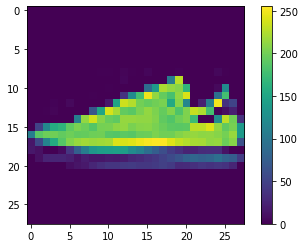

In [ ]:
plt.figure
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(10, activation='softmax')                     
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4996 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3747 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3389 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3142 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2953 - accuracy: 0.8906


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8721
Test accuracy: 0.8720999956130981


Trouser


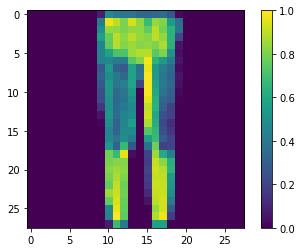

In [ ]:
predictions = model.predict(test_images)
# print(predictions[0])
print(class_names[np.argmax(predictions[3])])
plt.figure
plt.imshow(test_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 67


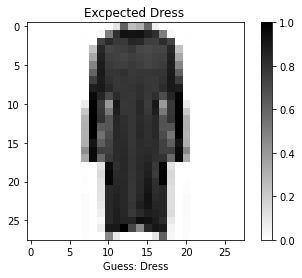

In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict( model , image , correct_label ) :
  class_names = ['T-shirt/top', 'Trouser','pullover', 'Dress', 'Coat',
                'sandal', 'Shirt', 'Sneker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image( image , class_names[correct_label] , predicted_class)

def show_image(img , label , guess):
  fig = plt.figure()
  plt.imshow(img, cmap=plt.cm.binary )
  plt.title(f"Excpected {label} ")
  plt.xlabel(f"Guess: {guess}")
  plt.colorbar()
  plt.grid(False)
  plt.show()  

def get_number() :
  while True:
    num = input("Pick a number: ")
    if num.isdigit() :
      num = int(num)
      if 0 <= num <= 1000 :
        return int(num)
    else :
      print("Try again ... ")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model , image , label)